In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/home/younous/.local/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df = train_df.astype(
    {
        'Name': 'str',
        'Sex': 'str',
        'Ticket': 'str',
        'Cabin': 'str',
        'Embarked': 'str'
    }
)
test_df = test_df.astype(
    {
        'Name': 'str',
        'Sex': 'str',
        'Ticket': 'str',
        'Cabin': 'str',
        'Embarked': 'str'
    }
)

In [5]:
test_df["Name"].dtype

dtype('O')

# Analyze by descrbing data
## Analyser en décrivant les données

In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Which features are categorical ?
#### Quelles caractéristiques sont catégoriques ?
On va chercher les colonnes qui sont de type catégorique

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S


Les features catégoriques nominales sont : Survived, Sex, et Embarked

Les features catégoriques ordinales sont : Pclass

### Défintition : 

**Une variable catégorique** (aussi appelée variable qualitative) réfère à une caractéristique qui n’est pas quantifiable. Une variable catégorique peut être nominale ou ordinale.

Exemple : Sex, Notes (A+, A, A-, B+, B,...)


**Une variable nominale** décrit un nom, une étiquette ou une catégorie sans ordre naturel

Exemple : Sex


**Une variable ordinale** est une variable dont les valeurs sont définies par une relation d’ordre entre les catégories possibles

Exmple : Notes

**Une variable numérique** (aussi appelée variable quantitative) est une caractéristique quantifiable dont les valeurs sont des nombres

On dit qu’une **variable est continue** si elle prend un nombre infini de valeurs réelles possibles à l’intérieur d’un intervalle donné.

Exemple : Valeur d'une maison

Contrairement à une variable continue, **une variable discrète** ne peut prendre qu’un nombre fini de valeurs réelles possibles à l’intérieur d’un intervalle donné

Exemple : Nombre de personnes dans une salle

## Which features are numerical?
### Quelles caractéristiques sont numériques ?

Les variables continues sont : Age, Fare

Les variables discrètes sont : SibSp, Parch

## Which features are mixed data types ?
### Quelles caractéristiques ont des données mixées ?

Ticket is a mix of numeric and alphanumeric data types

Ticket est un mixe de numérique et alphanumérique de type données

In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,nan,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,nan,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,nan,Q


## Which features contain blankn null or empty values ?
### Quelles fonctionnalités contiennent des valeurs vides ou nulles ?

Les fonctionnalités Cabin > Age > Embarked contiennent un certain nombre de valeurs nulles dans cet ordre pour l'ensemble de données d'entraînement.

Cabine > Âge sont incomplets en cas de jeu de données de test

## What are the data types for various features?
### Quels sont les types de données pour les différentes fonctionnalités ?

Sept caractéristiques sont des entiers ou des flottants. Six en cas d'ensemble de données de test.

Cinq caractéristiques sont des chaînes (objet).

In [10]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

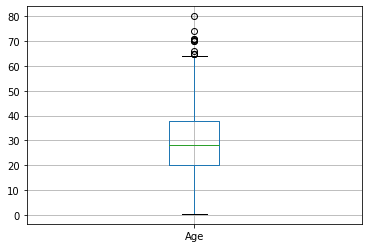

In [13]:
train_df.boxplot(column=['Age'])

In [15]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,4
top,"Braund, Mr. Owen Harris",male,347082,nan,S
freq,1,577,7,687,644


# Analyze by visualizing data

## Analyse par visualisation de données

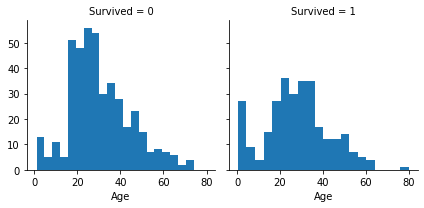

In [20]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)